In [2]:
import os, sys, re
from functools import partial
from collections import Counter

import pandas as pd
import numpy as np
import seaborn as sns

from pylab import rcParams
from IPython.display import HTML

from bubbleplot import bubble_plot, script_bubble_plot

sys.path.insert(1, os.path.join(sys.path[0], '..', '..'))

import database
from database.groups import YES, NO
from snowballing.operations import load_work, load_citations, reload
from snowballing.approaches import get_approaches, name, wlatex_name, wcitea
reload()

name = lambda x: x.display.replace("  ", "")

all_approaches = get_approaches()
script = [(a, m) for a, m in all_approaches if not m["binary"]]
binary = [(a, m) for a, m in all_approaches if m["binary"]]
len(script)

27

In [3]:
%matplotlib notebook
bubble_plot = partial(bubble_plot, script, binary)
script_bubble_plot = partial(script_bubble_plot, script)
rcParams['figure.figsize'] = 16, 8
sns.set(style='ticks', palette='BuGn') #Set2

Arnold
CARE
CDE
PASS
PTU
ReproZip


<IPython.core.display.Javascript object>


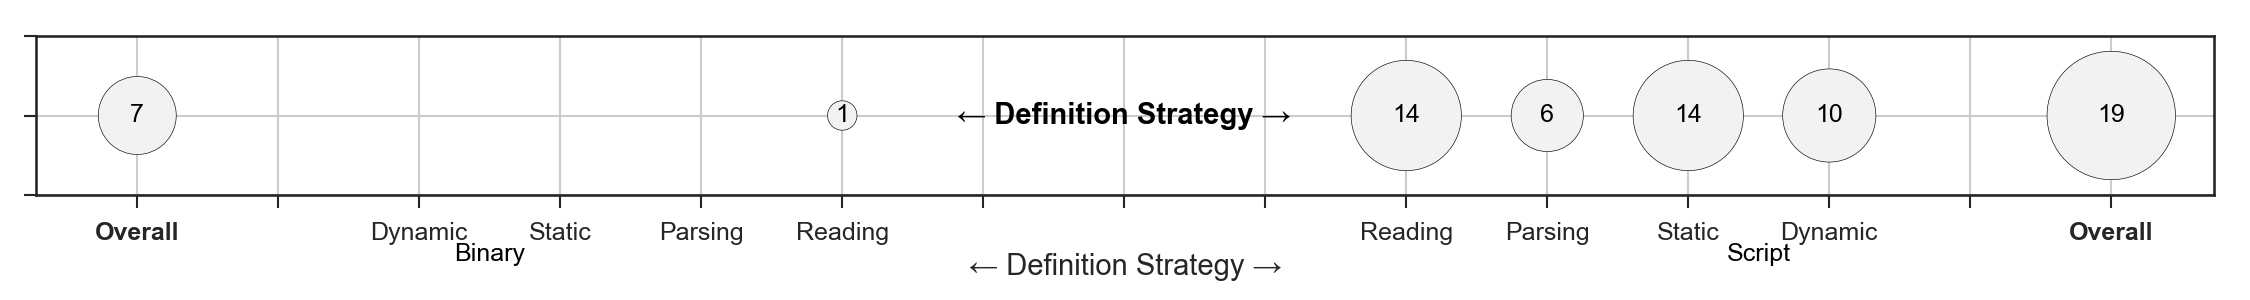

In [8]:
from database.groups import CACHE, COMPREHENSION, FRAMEWORK, MANAGEMENT, REPRODUCIBILITY, SECURITY
from database.groups import EXECUTION, PARSING, READING, ASKS, STATIC, DYNAMIC

columns = [CACHE, COMPREHENSION, FRAMEWORK, MANAGEMENT, REPRODUCIBILITY, SECURITY, "", "Overall"]
strategies = [READING, PARSING, STATIC, DYNAMIC]
rows = ["Reading", "Parsing", "Static", "Dynamic", "", "Overall"]

columns = ["", "← Definition Strategy →"]
categories = dict(zip(strategies, rows))

def process(approach, meta, add):
    if meta["definition"]:
        for strategy in meta["definition"]:
            #for goal in meta["supports"]:
            #    add(goal, categories[strategy], approach)
            #    add(goal, "Overall", approach)
            if strategy not in categories:
                print(name(approach))
                continue # Binary
            add("← Definition Strategy →", categories[strategy], approach)
        add("← Definition Strategy →", "Overall", approach)
            
rcParams['figure.figsize'] = 15, 2
plt, _ = bubble_plot(rows, columns, process, rate=200, axis_x="← Definition Strategy →", axis_y="", label_y=-1.5)
plt.ylim(ymax=4, ymin=0)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.35)

<IPython.core.display.Javascript object>


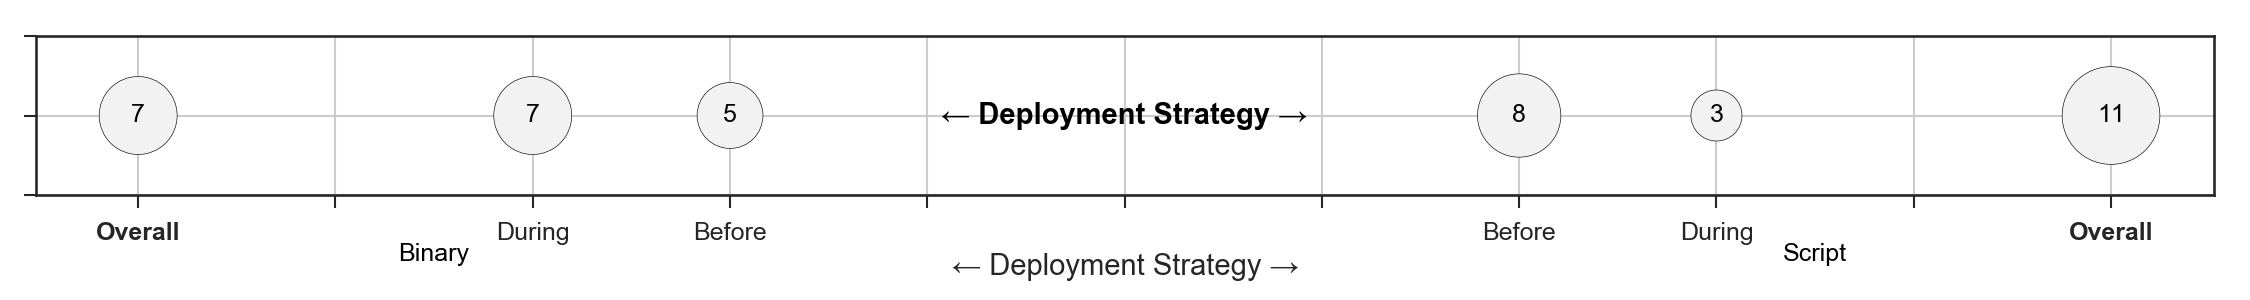

In [9]:
from database.groups import BEFORE_EXECUTION, DURING_EXECUTION

columns = [CACHE, COMPREHENSION, FRAMEWORK, MANAGEMENT, REPRODUCIBILITY, SECURITY, "", "Overall"]
strategies = [BEFORE_EXECUTION, DURING_EXECUTION]
rows = ["Before", "During", "", "Overall"]

columns = ["", "← Deployment Strategy →"]
categories = dict(zip(strategies, rows))

def process(approach, meta, add):
    if meta["deployment"]:
        for strategy in meta["deployment"]:
            #for goal in meta["supports"]:
            #    add(goal, categories[strategy], approach)
            #    add(goal, "Overall", approach)
            if strategy not in categories:
                print(name(approach))
            add("← Deployment Strategy →", categories[strategy], approach)
        add("← Deployment Strategy →", "Overall", approach)
            
rcParams['figure.figsize'] = 15, 2
plt, _ = bubble_plot(rows, columns, process, rate=200, axis_x="← Deployment Strategy →", axis_y="", label_y=-1.5)
plt.ylim(ymax=4, ymin=0)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.35)

<IPython.core.display.Javascript object>


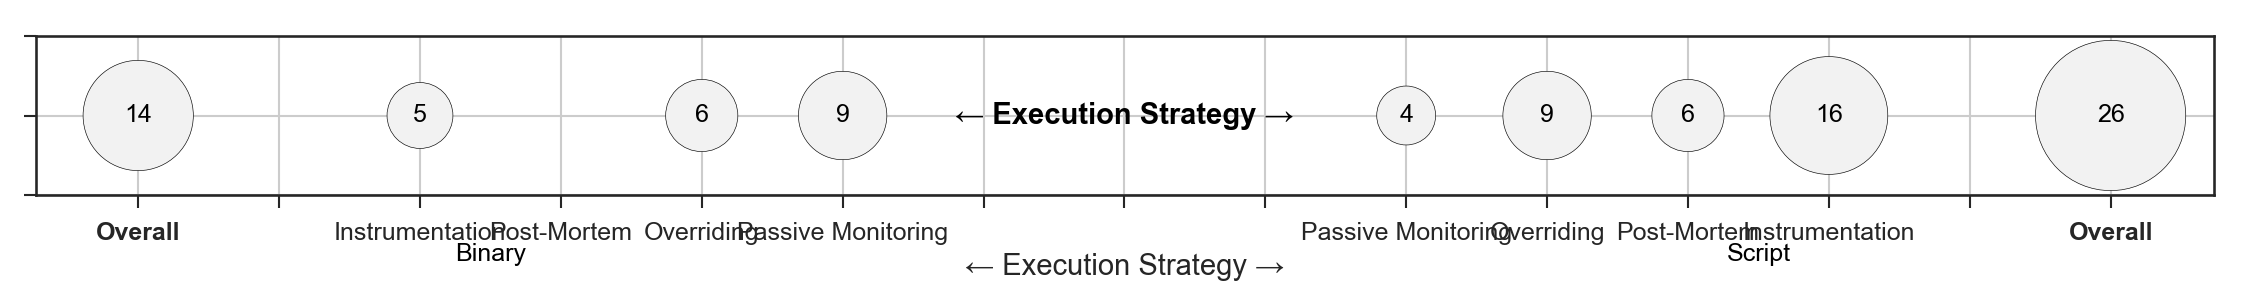

In [10]:
from database.groups import PASSIVE_MONITORING, OVERRIDING, POST_MORTEM, INSTRUMENTATION

columns = [CACHE, COMPREHENSION, FRAMEWORK, MANAGEMENT, REPRODUCIBILITY, SECURITY, "", "Overall"]
strategies = [PASSIVE_MONITORING, OVERRIDING, POST_MORTEM, INSTRUMENTATION]
rows = ["Passive Monitoring", "Overriding", "Post-Mortem", "Instrumentation", "", "Overall"]

columns = ["", "← Execution Strategy →"]
categories = dict(zip(strategies, rows))

def process(approach, meta, add):
    if meta["execution"]:
        for strategy in meta["execution"]:
            #for goal in meta["supports"]:
            #    add(goal, categories[strategy], approach)
            #    add(goal, "Overall", approach)
            add("← Execution Strategy →", categories[strategy], approach)
        add("← Execution Strategy →", "Overall", approach)
            
rcParams['figure.figsize'] = 15, 2
plt, _ = bubble_plot(rows, columns, process, rate=200, axis_x="← Execution Strategy →", axis_y="", label_y=-1.5)
plt.ylim(ymax=4, ymin=0)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.35)

<IPython.core.display.Javascript object>


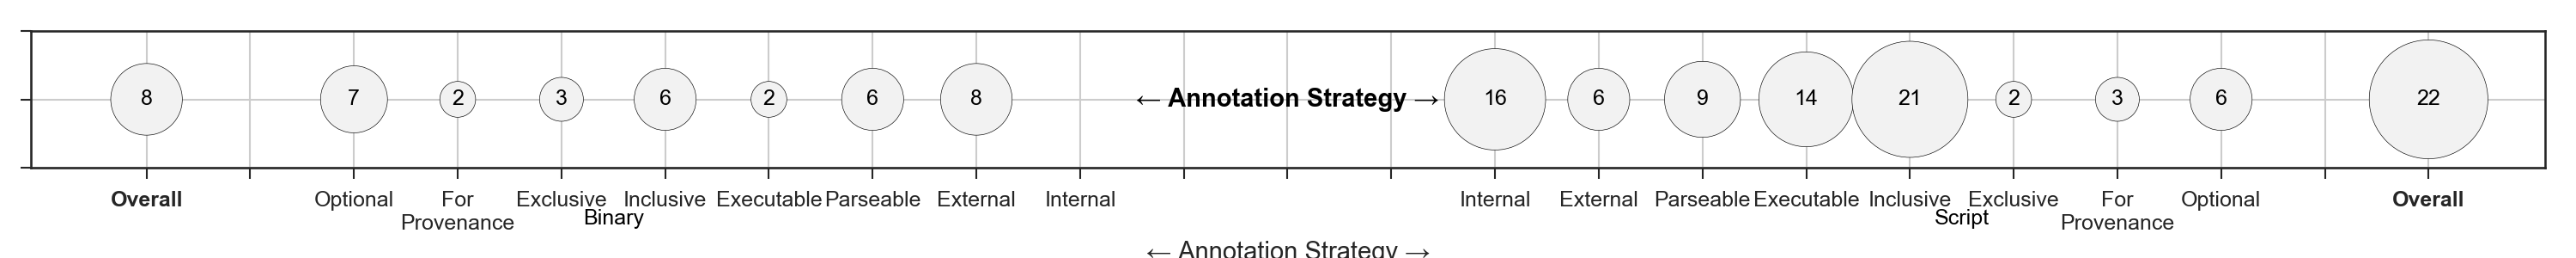

In [11]:
from database.groups import INTERNAL, EXTERNAL, PARSEABLE, EXECUTABLE, INCLUSIVE, EXCLUSIVE, PROVENANCE, OPTIONAL

columns = [CACHE, COMPREHENSION, FRAMEWORK, MANAGEMENT, REPRODUCIBILITY, SECURITY, "", "Overall"]
strategies = [INTERNAL, EXTERNAL, PARSEABLE, EXECUTABLE, INCLUSIVE, EXCLUSIVE, PROVENANCE, OPTIONAL]
rows = ["Internal", "External", "Parseable", "Executable", "Inclusive", "Exclusive", "For\nProvenance", "Optional", "", "Overall"]

columns = ["", "← Annotation Strategy →"]
categories = dict(zip(strategies, rows))

def process(approach, meta, add):
    if meta["annotations"]:
        for strategy in meta["annotations"]:
            #for goal in meta["supports"]:
            #    add(goal, categories[strategy], approach)
            #    add(goal, "Overall", approach)
            add("← Annotation Strategy →", categories[strategy], approach)
        add("← Annotation Strategy →", "Overall", approach)
            
rcParams['figure.figsize'] = 20, 2
plt, _ = bubble_plot(rows, columns, process, rate=200, axis_x="← Annotation Strategy →", axis_y="", label_y=-1.5)
plt.ylim(ymax=4, ymin=0)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.35)